In [32]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [34]:

data = {
    'income': [50000, 75000, 30000, 100000, 40000, 60000, 25000, 90000, 35000, 80000],
    'age': [30, 45, 22, 55, 28, 38, 20, 60, 25, 50],
    'loan_amount': [10000, 20000, 5000, 30000, 8000, 15000, 4000, 25000, 7000, 22000],
    'credit_score': [700, 750, 550, 800, 600, 680, 500, 790, 580, 720],
    'employment_status': ['Employed', 'Employed', 'Student', 'Employed', 'Unemployed', 'Employed', 'Student', 'Employed', 'Employed', 'Employed'],
    'default': [0, 0, 1, 0, 1, 0, 1, 0, 1, 0] # 0 = No Default, 1 = Default
}

In [80]:
# df=pd.DataFrame(data)
df= pd.read_csv("credit_data.csv")
df.drop("customer_id",axis=1,inplace=True)

In [81]:

print("--- Original Data Sample ---")
print(df.head())
print("\n")


--- Original Data Sample ---
   income  age  loan_amount  credit_score employment_status  \
0   69934   63        10614           678          Employed   
1   57234   59        15755           677          Employed   
2   72953   30        20982           483          Employed   
3   90460   22        16142           635           Retired   
4   55316   25        11853           630          Employed   

         loan_purpose  default  
0  Debt Consolidation        0  
1                Home        0  
2                 Car        1  
3                 Car        0  
4  Debt Consolidation        1  




In [82]:
# --- 2. Separate Features (X) and Target (y) ---
X = df.drop('default', axis=1)
y = df['default']


In [83]:
# --- 3. Identify Categorical and Numerical Features ---
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [84]:
# --- 4. Create Preprocessing Pipelines for Numerical and Categorical Features ---
# Numerical features: Scale them
numerical_transformer = StandardScaler()
# Categorical features: One-hot encode them
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [85]:

# Create a preprocessor using ColumnTransformer to apply different transformations
# to different columns. This forms the 'P' in the ML pipeline.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [86]:
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [87]:
# --- 5. Build the Machine Learning Pipeline ---
# A pipeline streamlines the workflow by chaining preprocessing steps with the model.
# This ensures that transformations learned from the training data are applied consistently
# to new data, preventing data leakage.
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(random_state=42))])


In [88]:
# --- 6. Split Data into Training and Testing Sets ---
# This step is crucial to evaluate how well your model generalizes to unseen data.
# test_size=0.3 means 30% of data will be used for testing.
# stratify=y ensures that the proportion of 'default' and 'no default' is maintained in both sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [89]:
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print("\n")

Training set size: 700 samples
Test set size: 300 samples




In [90]:
# --- 7. Train the Model ---
print("--- Training the Logistic Regression Model ---")
model_pipeline.fit(X_train, y_train)
print("Model training complete.\n")

--- Training the Logistic Regression Model ---
Model training complete.



In [91]:
# --- 8. Make Predictions ---
# Predict probabilities for the 'default' class (class 1)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
# Predict binary classes (0 or 1)
y_pred = model_pipeline.predict(X_test)


--- Model Evaluation ---
Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       231
           1       0.40      0.09      0.14        69

    accuracy                           0.76       300
   macro avg       0.59      0.52      0.50       300
weighted avg       0.69      0.76      0.70       300

ROC AUC Score: 0.70


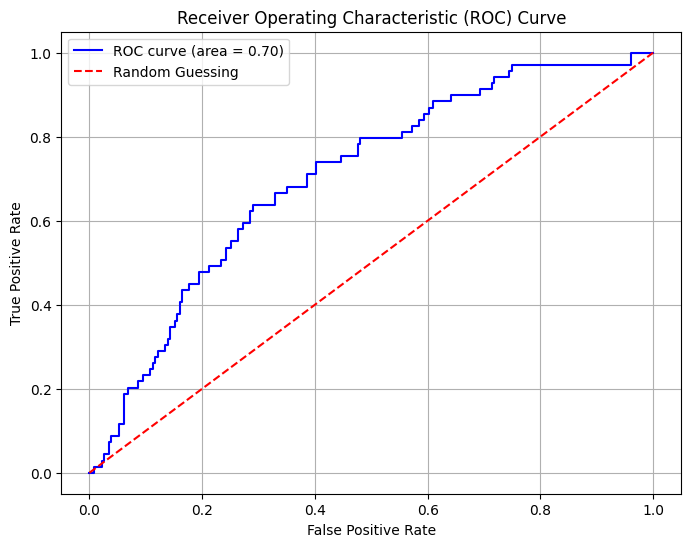


--- Model Interpretation (for Logistic Regression) ---
Coefficients (impact of features on log-odds of default):
                                 Feature  Coefficient
6         cat__employment_status_Student     0.616277
2                       num__loan_amount     0.411060
9   cat__loan_purpose_Debt Consolidation     0.377285
4        cat__employment_status_Employed     0.165044
10           cat__loan_purpose_Education     0.070490
1                               num__age    -0.018893
8                  cat__loan_purpose_Car    -0.048061
5         cat__employment_status_Retired    -0.137435
12               cat__loan_purpose_Other    -0.142818
0                            num__income    -0.237760
11                cat__loan_purpose_Home    -0.255391
3                      num__credit_score    -0.582560
7      cat__employment_status_Unemployed    -0.642380

--- Example Prediction for a New Applicant ---
New Applicant Data:
   income  age  loan_amount  credit_score employment_status lo

In [92]:
# --- 9. Evaluate the Model ---
print("--- Model Evaluation ---")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report (Precision, Recall, F1-score)
# Precision: Of all predicted defaults, how many were actually defaults?
# Recall: Of all actual defaults, how many did the model correctly identify?
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score (Area Under the Receiver Operating Characteristic Curve)
# A high AUC indicates that the model is good at distinguishing between positive and negative classes.
# An AUC of 0.5 means the model is as good as random guessing. An AUC of 1.0 is a perfect model.
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()





print("\n--- Model Interpretation (for Logistic Regression) ---")
# Accessing the trained logistic regression model from the pipeline
logistic_model = model_pipeline.named_steps['classifier']

# Get feature names after one-hot encoding and preprocessing
# This part can be tricky because OneHotEncoder adds new columns
try:
    feature_names_out = model_pipeline.named_steps['preprocessor'].get_feature_names_out()
    coefficients = pd.DataFrame({'Feature': feature_names_out, 'Coefficient': logistic_model.coef_[0]})
    print("Coefficients (impact of features on log-odds of default):")
    print(coefficients.sort_values(by='Coefficient', ascending=False))
except AttributeError:
    print("Could not retrieve feature names easily for interpretation due to pipeline complexity.")
    print("For complex pipelines, you might need to inspect preprocessor steps individually.")

print("\n--- Example Prediction for a New Applicant ---")
new_applicant = pd.DataFrame({
    'income': [70000],
    'age': [35],
    'loan_amount': [12000],
    'credit_score': [710],
    'employment_status': ['Employed'],
    'loan_purpose':['other']
})

prediction_proba = model_pipeline.predict_proba(new_applicant)[:, 1]
prediction_class = model_pipeline.predict(new_applicant)[0]

print(f"New Applicant Data:\n{new_applicant}")
print(f"Predicted Probability of Default: {prediction_proba[0]:.4f}")
print(f"Predicted Class (0=No Default, 1=Default): {prediction_class}")

if prediction_class == 0:
    print("Decision: Likely to approve loan.")
else:
    print("Decision: Likely to reject loan or require further review.")